# Reinforcement Learning by QLearning - The case of the stick game

In this notebook, we give an introduction to Q-Learning that is a framework to perform reinforcement learning. We provide an application to the stick game.
This notebook is a follow-up of another notebook on Q-learning with an application maze escape.
http://romain.raveaux.free.fr/document/ReinforcementLearningbyQLearning.html

## The goals : 
1. An introduction to Q-Learning 
1. An application to the stick game
1. Code in Python base Numpy and Matplotlib

## Author : Romain Raveaux


# Why a follow-up notebook

This notebook :http://romain.raveaux.free.fr/document/ReinforcementLearningbyQLearning.html .
This notebook is on Q-learning for a single player game that is to say the Escape the maze game.

## In this notebook, we want to explore a 2-players game : The stick game


# Reinforcement Learning 

We give some definitions that are mostly taken from (https://en.wikipedia.org/wiki/Reinforcement_learning).

Reinforcement learning (RL) 
1. is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. 
2. is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

Supervised Learning (SL) : 
1. It aims to learn a function $f$ that maps $\mathcal{X} \to \mathcal{Y}$ where $\mathcal{X}$ is the input domain and $\mathcal{Y}$ is the output domain. $f$ can be a composition of functions $f=f_1 \circ f_2 \circ \cdots f_k$. The learning stage must exploit pairs $(x \in \mathcal{X}  ,y \in \mathcal{Y})$.

Reinforcement learning (RL) 
1. It is similar from SL in such a way that the goal is to learn a function $f$ that maps $\mathcal{X} \to \mathcal{Y}$. $f$ can also be a composition of functions $f=f_1 \circ f_2 \circ \cdots f_k$. In RL, sub-functions are also called actions.
2. It differs from $\textbf{supervised learning}$ in that the learning stage exploits pairs $(x \in \mathcal{X}  ,\overline{y} \in \overline{\mathcal{Y}})$. Where $\overline{\mathcal{Y}}$ is domain of incomplete outputs such that $\overline{y} \subset y$.

![texte alt](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Reinforcement_learning_diagram.svg/500px-Reinforcement_learning_diagram.svg.png "toto")

The typical framing of a Reinforcement Learning (RL) scenario: an agent takes actions in an environment, which is interpreted into a reward and a representation of the state, which are fed back into the agent.
The environment is typically formulated as a Markov decision process (MDP)


# Markov decision process

A Markov decision process is a 4-tuple ${\displaystyle (S,A,P,R)}$, where

1. a set of environment and agent states, $S$;
1. a set of actions, $A$, of the agent;
1. $P={\displaystyle \Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)}$ is the probability of transition from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action ${\displaystyle a}$. $P:  A \times S \to  \mathbb{R}^S $
1. ${\displaystyle R(s,s',a)}$ is the immediate reward after transition from ${\displaystyle s}$ to ${\displaystyle s'}$ with action ${\displaystyle a}$. $R: S \times S \times A \to \mathbb{R}$

![texte alt](https://www.kdnuggets.com/images/reinforcement-learning-fig1-700.jpg "toto")


## Optimization problem with Markov decision process : Finding the best policy $\pi$
The core problem of Markov decision processes is to find a "policy" for the decision maker: a function $\pi$  that specifies the action $a=\pi(s)$ that the decision maker will choose when in state $s$.
In the Markov decision process, we want to maximize the sum of the rewards over all time steps.

$$\pi^*=arg \max_{\pi} \sum_{t=1}^T R(s_t,s^*,\pi(a^*))  $$
$$s^*,a^*=arg \max_{s',a} \Pr(s'\mid s_{t},a)$$

The goal is to choose a policy $\pi$  that will maximize some cumulative function of the random rewards, typically the expected discounted sum over a potentially infinite horizon:

${\displaystyle E[\sum _{t=0}^{\infty }{\gamma ^{t}R(a_t,s_{t},s_{t+1})}]}$   (where we choose ${\displaystyle a_{t}=\pi (s_{t})}$, i.e. actions given by the policy). And the expectation is taken over ${\displaystyle s_{t+1}\sim P}({a_{t},s_{t},s_{t+1})}$
where  $\gamma$   is the discount factor satisfying ${\displaystyle 0\leq \ \gamma \ \leq \ 1}$, which is usually close to 1.

## Decision phase
Once a Markov decision process is combined with a policy in this way, this fixes the action for each state and the resulting combination behaves like a Markov chain (since the action chosen in state {\displaystyle s}s is completely determined by $\pi(s)$ and  $\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$ reduces to $\Pr(s_{t+1}=s'\mid s_{t}=s)$, a Markov transition matrix).


# Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

# Q-learning 

The goal of Q-learning is to learn a policy $\pi(s)$, which tells an agent what action to take under what state.

Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state.

"Q" names the function that returns the reward used to provide the reinforcement and can be said to stand for the "quality" of an action taken in a given state.

$$Q: S \times A \to \mathbb{R} $$



Before learning begins, $Q$ is initialized to a possibly arbitrary fixed value (chosen by the programmer). Then, at each time $t$ the agent selects an action $a_{t}$, observes a reward $r_{t}$, enters a new state $s_{t+1}$ (that may depend on both the previous state $s_{t}$ and the selected action), and $Q$ is updated. The core of the algorithm is a simple value iteration update, using the weighted average of the old value and the new information:

${\displaystyle Q^{new}(s_{t},a_{t})\leftarrow (1-\alpha )\cdot \underbrace {Q(s_{t},a_{t})} _{\text{old value}}+\underbrace {\alpha } _{\text{learning rate}}\cdot \overbrace {{\bigg (}\underbrace {r_{t}} _{\text{reward}}+\underbrace {\gamma } _{\text{discount factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\text{estimate of optimal future value}}{\bigg )}} ^{\text{learned value}}}$
where ${\displaystyle r_{t}}$ is the reward received when moving from the state $s_{{t}}$ to the state $s_{t+1}$, and $\alpha$  is the learning rate $0<\alpha \leq 1$).

## Discount factor  $\gamma$
The discount factor $\gamma$  determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, i.e. $r_{t}$ (in the update rule above), while a factor approaching 1 will make it strive for a long-term high reward. 

# Exploring the action state space
In the learning phase, the state space of action $a_t$ must be explored. This is achieved by the concerp of exploration and exloitation.

## Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

## Epsilon-greedy policy $\pi(s,\epsilon,rnd)$
$\epsilon$ is the probabiliy of exploration. Let $rnd$ be a random number between 0 and 1.
$$\begin{eqnarray}
\epsilon < rnd  \quad& a^*=\pi(s)=random_a \, Q(s,a) &\quad Exploration \\
\epsilon \geq rnd \quad& a^*=\pi(s)= \max_a Q(s,a) & \quad Exploitation \\
\end{eqnarray}$$




# Q-Learning Algorithm

![texte alt](http://romain.raveaux.free.fr/document/Qlearningalgoithme.PNG "toto")

# The case of a 2-players game


# Q-Learning Algorithm for 2 players.
The key idea is to train two players at the time. 
Another key point is that the reward depends on the failure or the sucess of the other player. If player one made a move that led to the KO of the player two then player one move should be rewarded.

![texte alt](http://romain.raveaux.free.fr/document/Qlearningalgoithme2players.PNG "toto")
In the above algorithm, it is possible to make player 2 a random player by fixing $\epsilon$ to 1. Note that if player 2 is stupid then player 1 might not be very clever to win :-) 

# The game of sticks

## The game of sticks is a variation of the Nim game.

Nim is a combinatorial game, where two players alternately take turns in taking objects from several heaps. The only rule is that each player must take at least one object on their turn, but they may take more than one object in a single turn, as long as they all come from the same heap.

## In the game of sticks, there are 12 sticks and each player can take from 1 to 3 sticks at the time. The player that takes the last stick lose the game

# Modeling the game
The 12 sticks will be modeled by a vector of 12 binary variables. V[x] refers to a cell of the vector. 
Each cell has a value :
1. 1 saying that the stick is present
1. 0 saying that the stick is absent

An action can take the following values : $A=\{1,2,3\}$. 1, 2 or 3 sticks cane be removed

The agent can take the following values : $S=\{0,\cdots,  11\}$. One value corresponds to one location (x) of the vector V. State 11 corresponds to the twelfth stick, ...,  State 0 corresponds to the first stick.


# Start to code
## Let us define some import to manage matrices and plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Let us define the sticks



V.shape= (12, 1)
V
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Text(0.5,1,'The sticks')

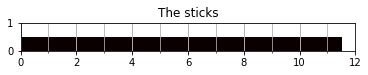

In [2]:
nbsticks=12
V=np.ones((nbsticks,1))

#Print the sticks
print("V.shape=",V.shape)
print("V\n",V)

#Plot the sticks
fig=plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

plt.xlim(0,12)
plt.ylim(0,1)
grid_x_ticks = np.arange(0, 12, 1)
grid_y_ticks = np.arange(0, 1, 1)

ax.set_xticks(grid_x_ticks , minor=True)
ax.set_yticks(grid_y_ticks , minor=True)


plt.imshow(V.T,cmap='hot')
plt.grid(b=True,which='both')
plt.title("The sticks")


# We define the set of actions A, the set of agent states S and the Q table.


In [3]:
A = np.array([1,2,3])
S =[]
for i in range(0,nbsticks):
    S.append(i)
S=np.array(S)
print("S.shape=",S.shape)
print("A.shape=",A.shape)
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))
print("Q1.shape=",Q1.shape)



S.shape= (12,)
A.shape= (3,)
Q1.shape= (12, 3)


# Step in the sticks vector
## The function allows to take an action in the game

In [4]:
def step(action,agentstate,V):
    # Let's take action
    done=False

    #We update the state after moving
    newagentstate=agentstate-action

    #We get a reward
    if agentstate-action>0:
        #if there are still some sticks left then we are good
        reward=0
        #We put to 0 all the sticks that are taken
        V[newagentstate:agentstate]=0
    else:
        V[0:V.shape[0]-1]=0
        #you lose so a good reward for the player that could make him lose !!!
        reward=1
        # the game is over
        done=True
           
    return newagentstate,reward,done
V=np.ones((nbsticks,1))    
print(step(1,12,V) )
print(V)
print(step(3,11,V) )
print(V)
print(step(3,8,V) )
print(V)
print(step(3,5,V) )
print(V)
print(step(2,2,V) )
print(V)

(11, 0, False)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
(8, 0, False)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
(5, 0, False)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(2, 0, False)
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(0, 1, True)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Random walk
## Let's move randomly in the maze
## This is equivalent to $\epsilon=1$ in the epsilon greedy policy

3 12 9 False
3 9 6 False
1 6 5 False
2 5 3 False
1 3 2 False
3 2 -1 True


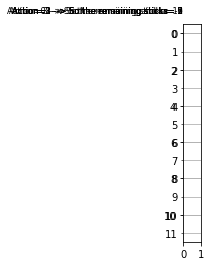

In [5]:
fig = plt.figure() # just for display
ax = fig.add_subplot(1, 1, 1)

#plt.ylim(0,12)
plt.xlim(0,1)
#grid_x_ticks = np.arange(0, 12, 1)
grid_y_ticks = np.arange(0, 12, 1)

ax.set_yticks(grid_y_ticks , minor=True)
ax.set_yticklabels(grid_y_ticks , minor=True)
plt.grid(b=True,which='both')


state=12 #initial state of the agent
done=False
listimages=[] # just for display : store images
V=np.ones((nbsticks,1))
ttl = plt.text(0, -1, "Action="+str(0)+" --> So the remaining sticks= "+str(12), horizontalalignment='right', verticalalignment='bottom', fontsize="small")
im = plt.imshow(V, animated=True,vmin=0, vmax=1,cmap='binary') # display sticks
listimages.append([ttl,im]) # display sticks
while done != True: # Move until the game is over
    action = np.random.choice(A) # Choose a random action
    newtstate,reward,end=step(action,state,V) # Move according to the action
    print(action,state,newtstate,end) # print
    state=newtstate # update state
    done=end # update are we done or not ? 
    ttl = plt.text(0, -1, "Action="+str(action)+" --> So the remaining sticks= "+str(newtstate), horizontalalignment='right', verticalalignment='bottom', fontsize="small")
    im = plt.imshow(V, animated=True,vmin=0, vmax=1,cmap='binary') # display sticks
    listimages.append([ttl,im]) # display sticks
    

#  Let's animate

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(fig, listimages, interval=2000, blit=True,
                                repeat_delay=100)


ani.save('RandomSticks.mp4')

plt.show()
HTML(ani.to_html5_video())


# Time to learn how to play

# Code : Q-Learning 

 


# $\epsilon$-greeedy policy

In [7]:
# Choose an action from the espilon greedy policy
def ChooseActionFromPolicy(A,epsilon,Q,state):
    #we remove one to go from states to array indices
    statee=state-1
    
    rnd=np.random.random()
    if rnd<epsilon:
        action = np.random.choice(A)
    else:
        action = Q[statee,:].argmax()+1

    return action


# Update the Q Table

In [8]:
# Update the Q table (see equation above)
def UpdateQ(Q,state,action,newstate,reward,alpha,gamma):
    #we remove one to go from states to array indices
    statee=state-1
    newstatee=newstate-1
    actione=action-1
        
    firstterm=(1-alpha)*Q[statee,actione]
    secondterm=gamma*Q[newstatee,:].max()
    thirdterm=alpha*(reward+secondterm)
    res=firstterm+thirdterm
    Q[statee,actione]=res

# Play One Game and learn the Q table

In [9]:
# Debug function to do some display
def debugfunction(at,s,V,Q1,Q2,epsilon,t,player,listimages):
        #code for display
        ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(player)+"="+str(at)+" and remaining sticks="+str(s)+
                       "| Number of games="+str(t)+"| epsilon="+"{:.2f}".format(epsilon)                       
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
        im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
        im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
        listimages.append([im1,im2,im3,ttl])
    
# Let's play one game
def OneGameLearning(A,Q1,Q2,V,epsilon1,espilon2,alpha,gamma,listimages,t,debug):
    if debug==True:
        debugfunction(-1,12,V,Q1,Q2,-1,t,-1,listimages)        
        
       
    s=12 #initial state
    done = False
    # Player one plays first
    at1= ChooseActionFromPolicy(A,epsilon1,Q1,s) #choose an action
    st1,rt1,end1=step(at1,s,V) # Move according to the action
    
    #code for debug and display
    if debug==True:
        print("s=",s,"     Q1=",Q1[s-1,:])
        print("at1=",at1,"     st1=",st1)
        debugfunction(at1,st1,V,Q1,Q2,epsilon1,t,1,listimages)        
     #end code for debug and display   
    
    while done != True : # Move until a player lose
        # Player two plays
        
        at2= ChooseActionFromPolicy(A,epsilon2,Q2,st1) #choose an action
        st2,rt2,end2=step(at2,st1,V) # Move according to the action
        #Update Q1
        UpdateQ(Q1,s,at1,st2,rt2,alpha,gamma)
        
        if debug==True:
            print("st1=",st1,"     Q2=",Q2[st1-1,:])
            print("at2=",at2,"     st2=",st2)
            debugfunction(at2,st2,V,Q1,Q2,epsilon2,t,2,listimages)        
        
        
        #player 1 has won
        if end2 == True:
            return 1
        
        # Player one plays
        at3= ChooseActionFromPolicy(A,epsilon1,Q1,st2) #choose an action
        st3,rt3,end1=step(at3,st2,V) # Move according to the action
        #Update Q2
        UpdateQ(Q2,st1,at2,st3,rt3,alpha,gamma)
        
        if debug==True:
            print("st2=",st2,"     Q1=",Q1[st2-1,:])
            print("at3=",at3,"     st3=",st3)
            debugfunction(at3,st3,V,Q1,Q2,epsilon1,t,1,listimages)        
        
            
        #player 2 has won
        if end1 == True:
            return 2
        
        
        s=st2
        st1=st3
        at1=at3
        done=end2        
    
    return 0



# Let us run 5 games. The goal is to show the learning of the Qtables step by step.
# Player 2 is random player (epsilon=1). He always does exploration. He never takes advantage of the knowledge inside the Qtable. Player 1 exploits more his knowledge 70 percent of time.


S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
s= 12      Q1= [0. 0. 0.]
at1= 1      st1= 11
st1= 11      Q2= [0. 0. 0.]
at2= 1      st2= 10
st2= 10      Q1= [0. 0. 0.]
at3= 3      st3= 7
st1= 7      Q2= [0. 0. 0.]
at2= 2      st2= 5
st2= 5      Q1= [0. 0. 0.]
at3= 1      st3= 4
st1= 4      Q2= [0. 0. 0.]
at2= 3      st2= 1
st2= 1      Q1= [0. 0. 0.]
at3= 1      st3= 0
t= 0 epsilon1= 0.3  player  2  wins
s= 12      Q1= [0. 0. 0.]
at1= 1      st1= 11
st1= 11      Q2= [0. 0. 0.]
at2= 3      st2= 8
st2= 8      Q1= [0. 0. 0.]
at3= 1      st3= 7
st1= 7      Q2= [0. 0. 0.]
at2= 3      st2= 4
st2= 4      Q1= [0. 0. 0.]
at3= 1      st3= 3
st1= 3      Q2= [0. 0. 0.]
at2= 3      st2= 0
t= 1 epsilon1= 0.3  player  1  wins
s= 12      Q1= [0. 0. 0.]
at1= 1      st1= 11
st1= 11      Q2= [0. 0. 0.]
at2= 3      st2= 8
st2= 8      Q1= [0. 0. 0.]
at3= 3      st3= 5
st1= 5    

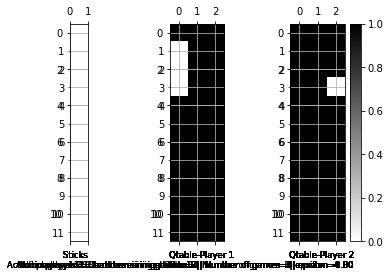

In [10]:
# the code for display
# we create figure for animation
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################

#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the vector to 1
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=5 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the vector to 1
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1,Q2,V,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1
    
    print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player two : "+str(statsnbplayeronewins))
f.colorbar(listimages[4][0], ax=axarr[2])

In [11]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(f, listimages, interval=8000, blit=True,
                                repeat_delay=100)


ani.save('QlearningSticks.mp4')

plt.show()


In [12]:
HTML(ani.to_html5_video())


# Let us run 10 000 games. The goal is to see what is learnt. We want to see how the Qtables look like after 10 000 games. Player 2 is a random player

S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
Fin du QLearning !!!
Percentage of winning games for player one : 68.63


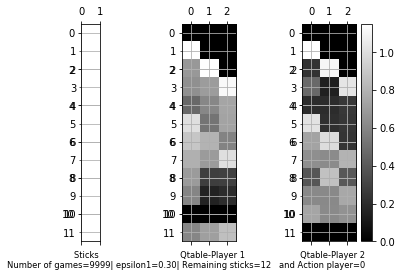

In [13]:
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################

#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the vector to 1
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1,Q2,V,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nNumber of games="+str(t)+"| epsilon1="+"{:.2f}".format(epsilon1)+
                       "| Remaining sticks="+str(12)+"   and Action player="+str(0)                   
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])



# Comment on the winning rate of player 1 
## It is closed to 70 percent that is related to percentage of randomness (30 percent)
# Comment on the image above : 
### Let us see Qtable1 : Qtable for player 1
### From state 4 (row 3) : player 1 will take 3 sticks. Player 2 will have only 1 stick left and player 2 will lose.
### From state 3 (row 2) : player 1 will take 2 sticks. Player 2 will have only 1 stick left and player 2 will lose.
### From state 1 (row 1) : player 1 will take 1 stick. Player 2 will have only 1 stick left and player 2 will lose.
### .... 

# Let's us play one game without learning. Player 1 does exploitation all the time. Player 2 is a random player.

S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q1= [[0.         0.         0.        ]
 [1.6033802  0.         0.        ]
 [0.95533291 1.59543428 0.        ]
 [0.90252208 0.97767361 1.56016959]
 [0.65203464 0.85018382 1.03779015]
 [1.39987745 0.73085309 1.03248874]
 [1.24059847 1.1294098  0.82654819]
 [1.10503559 0.97092811 1.39844446]
 [0.97542326 0.39415866 0.40273434]
 [0.83658141 0.21796553 0.27941097]
 [0.         0.         0.        ]
 [0.84402776 0.99994362 1.20075593]]
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
s= 12      Q1= [0.84402776 0.99994362 1.20075593]
at1= 3      st1= 9
st1= 9      Q2= [0.38631495 0.86713871 0.39938024]
at2= 1      st2= 8
st2= 8      Q1= [1.10503559 0.97092811 1.39844446]
at3= 3      st3= 5
st1= 5      Q2= [0.20166261 0.20491283 0.25856382]
at2= 3      st2= 2
st2= 2      Q1= [1.6033802 0.        0.       ]
at3= 1      st3= 1
st1= 1      Q2= [0. 0. 0.]
at2= 2      s

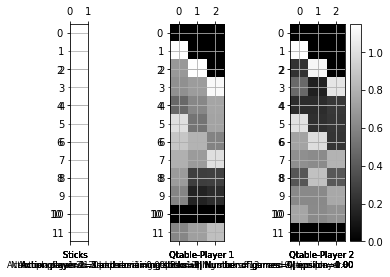

In [14]:
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q1=",Q1)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=1 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),V,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1
    print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nNumber of games="+str(t)+"| epsilon1="+"{:.2f}".format(epsilon1)+
                       "| Remaining sticks="+str(12)+"   and Action player="+str(0)                   
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])

# Let us create a video

In [15]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(f, listimages, interval=8000, blit=True,
                                repeat_delay=100)


ani.save('QlearningSticksPlay.mp4')

plt.show()


In [16]:
HTML(ani.to_html5_video())


# Now let us how strong is player 1 on 10000 games against a random player

S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q1= [[0.         0.         0.        ]
 [1.6033802  0.         0.        ]
 [0.95533291 1.59543428 0.        ]
 [0.90252208 0.97767361 1.56016959]
 [0.65203464 0.85018382 1.03779015]
 [1.39987745 0.73085309 1.03248874]
 [1.24059847 1.1294098  0.82654819]
 [1.10503559 0.97092811 1.39844446]
 [0.97542326 0.39415866 0.40273434]
 [0.83658141 0.21796553 0.27941097]
 [0.         0.         0.        ]
 [0.84402776 0.99994362 1.20075593]]
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
Fin du QLearning !!!
Percentage of winning games for player one : 96.37


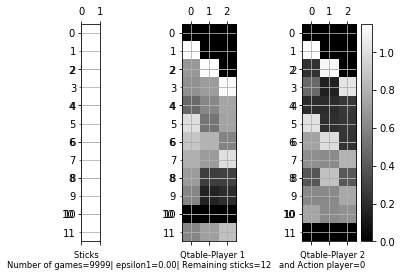

In [17]:
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q1=",Q1)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),V,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nNumber of games="+str(t)+"| epsilon1="+"{:.2f}".format(epsilon1)+
                       "| Remaining sticks="+str(12)+"   and Action player="+str(0)                   
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])


# Player 1 should have won all games. The learning of the Qtable was good enough to discover the winning strategy. Why ? It is harder to learn when the opponent is a random player. Let us give to player 2 some cleverness by decreasing the epsilon value to 0.3

S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
Fin du QLearning !!!
Percentage of winning games for player one : 64.7


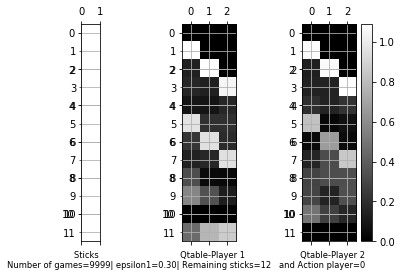

In [18]:
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################

#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the vector to 1
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=0.3 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1,Q2,V,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nNumber of games="+str(t)+"| epsilon1="+"{:.2f}".format(epsilon1)+
                       "| Remaining sticks="+str(12)+"   and Action player="+str(0)                   
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])



# Comment on the image above : 
### Let us see Qtable1 : Qtable for player 1
### From state 8 (row 7) : player 1 will take 3 sticks. Player 2 will have only 5 sticks left and player 2 will lose. When only 5 sticks remains there is no way of winning the game
### From state 7 (row 6) : player 1 will take 2 sticks. Player 2 will have only 5 sticks left and player 2 will lose. When only 5 sticks remains there is no way of winning the game
### From state 8 (row 7) : player 1 will take 3 sticks. Player 2 will have only 5 sticks left and player 2 will lose. When only 5 sticks remains there is no way of winning the game
### From state 6 (row 5) : player 1 will take 1 stick. Player 2 will have only 5 sticks left and player 2 will lose. When only 5 sticks remains there is no way of winning the game

# This is the winning strategy. It has been really discovered

# Now let us how strong is player 1 on 10000 games against a random player

S= [ 0  1  2  3  4  5  6  7  8  9 10 11]
S.shape= (12,)
A= [1 2 3]
A.shape= (3,)
Q1.shape= (12, 3)
Q1= [[0.         0.         0.        ]
 [2.67905803 0.         0.        ]
 [0.33528291 2.66296943 0.        ]
 [0.40740736 0.34129163 2.56797662]
 [0.2306213  0.21113631 0.40931391]
 [2.3956699  0.5033168  0.50761328]
 [0.56819685 2.35882193 0.45210598]
 [0.35630168 0.4159974  2.35190007]
 [0.81816799 0.10631829 0.09720762]
 [1.39824892 0.86156311 0.30881523]
 [0.         0.         0.        ]
 [1.12470685 1.91036966 2.14418806]]
Q2.shape= (12, 3)
V= [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
V.shape= (12, 1)
Fin du QLearning !!!
Percentage of winning games for player one : 100.0


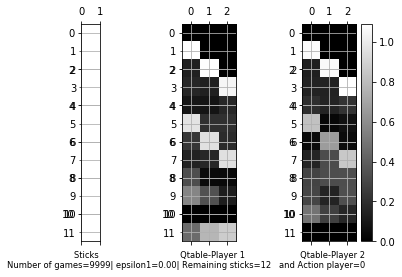

In [19]:
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation

axarr[0].set_xlim([0, 1])
axarr[0].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[0].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[1].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[1].set_yticklabels(np.arange(1, 13, 1),minor=True)

axarr[2].set_yticks(np.arange(1, 13, 1),minor=True)
axarr[2].set_yticklabels(np.arange(1, 13, 1),minor=True)


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


####################
# Q learning runnning
####################
V=np.ones((nbsticks,1))

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q1=",Q1)
print("Q2.shape=",Q1.shape)
print("V=",V.T)
print("V.shape=",V.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    V=np.ones((nbsticks,1))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),V,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 12, 
                       "Sticks                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nNumber of games="+str(t)+"| epsilon1="+"{:.2f}".format(epsilon1)+
                       "| Remaining sticks="+str(12)+"   and Action player="+str(0)                   
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
im1 = axarr[0].matshow(V, animated=True,vmin=0, vmax=1,cmap='binary')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])


# We dit it !!!! Player 1 win all the time when it start the game.
# Player 1 has discovered the winning strategy. 
# It is easier to learn to play when the opponent is clever (or more predictable) !!!
# Note that with more games (100 000) we could achieve the same performance while playing against a complete random player

# Next : 
## Let's try another game : Connect Four.
![Drag Racing](https://upload.wikimedia.org/wikipedia/en/7/79/Connect_4_Board_and_Box.jpg)
